In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

Read in hobo pressure sensor .csv data

In [2]:
# path to met station data
pname = 'C:/Users/nrrandall/NRR/DUNEX/1149/hobo/'
pname2 = 'C:/Users/nrrandall/NRR/DUNEX/NOAA/'
# hobo pressure logger
fn = 'DUNEX_PI_baro1.csv'
fnd = 'Duck.csv'
fnh = 'Hatteras.csv'
fno = 'OregonIn.csv'

In [24]:
# read in pressure data from hobo
df = pd.read_csv(pname+fn, delimiter=',', header=1)
df['dt'] = pd.to_datetime(df['Date Time, GMT-04:00'], format='%m/%d/%Y %I:%M:%S %p')
dthobo = df['dt'].values
atm_hobo = df['Abs Pres, kPa (LGR S/N: 10079950, SEN S/N: 10079950)'].values*10

Read in Duck and Hatteras pressure sensor data

In [18]:
# Duck
dfd = pd.read_csv(pname2+fnd, na_values='-') # rows 8299:8364 have no data, so converted to NaNs
dfd['dt'] = pd.to_datetime(dfd['Date'] + ' ' + dfd['Time (GMT)'])
# save variables for Duck
dtd = dfd['dt'].values #time
atm_d = dfd.iloc[:,6].values #barometric pressure (millibars)

In [19]:
# Hatteras
dfh = pd.read_csv(pname2+fnh, na_values='-')
dfh['dt'] = pd.to_datetime(dfh['Date'] + ' ' + dfh['Time (GMT)'])
# save variables for Hatteras
dth = dfh['dt'].values #time
atm_h = dfh.iloc[:,6].values #barometric pressure (millibars)

In [20]:
# Oregon Inlet
dfo = pd.read_csv(pname2+fno, na_values='-')
dfo['dt'] = pd.to_datetime(dfo['Date'] + ' ' + dfo['Time (GMT)'])
# save variables for Hatteras
dto = dfo['dt'].values #time
atm_o = dfo.iloc[:,6].values #barometric pressure (millibars)

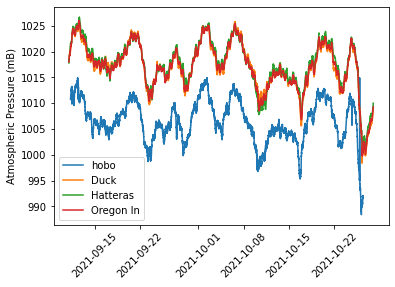

In [28]:
plt.plot(dthobo,atm_hobo,label='hobo')
plt.plot(dtd, atm_d, label='Duck')
plt.plot(dth, atm_h, label='Hatteras')
plt.plot(dto, atm_o, label='Oregon In')
plt.xticks(rotation=45)
plt.ylabel('Atmospheric Pressure (mbar)')
plt.legend()
plt.show()